<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>1. Import libraries that you required and Load the data set.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Restaurant Id: Unique id of every restaurant across various cities of the world
* url: url of the restaurant
* Address: Address of the restaurant
* Restaurant Name: Name of the restaurant
* Has Online order: yes/ no
* Has Table booking: yes/no
* Rate: rating out of 5
* Votes: Number of ratings cast by people
* Phone: phone number of the restaurant
* Location: where the restaurant is located
* restaurant type: the type of restaurant
* Dish liked: most liked dish in the restaurant
* Cuisines: Cuisines offered by the restaurant
* Approx Cost for two: Cost for two people
* Review list
* Menu item
* Listed in(type): Specifies the type of service provided by a restaurant
* Listed in(city): delivery location

In [2]:
df=pd.read_csv("Zomoto.CSV",index_col=0)

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14221 to 27432
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          10000 non-null  object
 1   address                      10000 non-null  object
 2   name                         10000 non-null  object
 3   online_order                 10000 non-null  object
 4   book_table                   10000 non-null  object
 5   rate                         8528 non-null   object
 6   votes                        10000 non-null  int64 
 7   phone                        9764 non-null   object
 8   location                     9997 non-null   object
 9   rest_type                    9953 non-null   object
 10  dish_liked                   4642 non-null   object
 11  cuisines                     9995 non-null   object
 12  approx_cost(for two people)  9941 non-null   object
 13  reviews_list               

In [5]:
print("Columns with object data type :")
for i in df.select_dtypes(include=object):
    print(i)

Columns with object data type :
url
address
name
online_order
book_table
rate
phone
location
rest_type
dish_liked
cuisines
approx_cost(for two people)
reviews_list
menu_item
listed_in(type)
listed_in(city)


* Here rate, approxcost should be numeric, we will type cast these columns

In [6]:
print("Columns with numeric data type :")
for i in df.select_dtypes(exclude=object):
    print(i)

Columns with numeric data type :
votes


In [7]:
df.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                           1472
votes                             0
phone                           236
location                          3
rest_type                        47
dish_liked                     5358
cuisines                          5
approx_cost(for two people)      59
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [8]:
df.shape

(10000, 17)

* There are 10000 rows and 17 columns in the dataset

### Missing values:
#### rate-1472
#### phone-236
#### location-3
#### rest_type-47
#### dish_liked-5358 (MAX)
#### cuisines-5
#### approx_cost(for two people)-59

### Percentage of missing data

In [9]:
features_na = [features for features in df.columns if df[features].isnull().sum()>0]
print(features_na)
for features in features_na:
    print('{} has {} % missing values '.format(features,round(df[features].isnull().sum()/ len(df)*100,4)))

['rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)']
rate has 14.72 % missing values 
phone has 2.36 % missing values 
location has 0.03 % missing values 
rest_type has 0.47 % missing values 
dish_liked has 53.58 % missing values 
cuisines has 0.05 % missing values 
approx_cost(for two people) has 0.59 % missing values 


In [10]:
missing=df.isnull().sum()/df.shape[0]*100
missing

url                             0.00
address                         0.00
name                            0.00
online_order                    0.00
book_table                      0.00
rate                           14.72
votes                           0.00
phone                           2.36
location                        0.03
rest_type                       0.47
dish_liked                     53.58
cuisines                        0.05
approx_cost(for two people)     0.59
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
dtype: float64

In [11]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR


## Cleaning data and handling null values

### Dealing with Rating column
### Rate column shows three variation for irregular data with values: NEW,"nan","-"

In [12]:
df["rate"].unique()

array(['3.2/5', '3.6 /5', '3.7/5', '3.4 /5', 'NEW', '4.2/5', nan,
       '3.5 /5', '4.1 /5', '3.4/5', '4.3 /5', '4.5/5', '3.0/5', '3.9/5',
       '3.0 /5', '4.0 /5', '4.2 /5', '3.5/5', '2.9 /5', '4.3/5', '4.4 /5',
       '3.8/5', '3.6/5', '3.3/5', '3.9 /5', '3.3 /5', '4.7/5', '3.1 /5',
       '-', '4.5 /5', '3.2 /5', '3.8 /5', '3.7 /5', '2.5 /5', '4.0/5',
       '4.6 /5', '4.1/5', '2.6/5', '3.1/5', '4.4/5', '2.6 /5', '2.7 /5',
       '2.9/5', '2.5/5', '2.8/5', '4.6/5', '4.7 /5', '2.8 /5', '4.8 /5',
       '4.8/5', '2.7/5', '4.9 /5', '2.2/5', '2.3 /5', '4.9/5', '2.4 /5',
       '2.3/5', '2.1 /5', '2.4/5', '2.1/5', '2.2 /5'], dtype=object)

In [13]:
# Replace with np.nan
df.replace('NEW',np.nan,inplace=True)
df.replace('-',np.nan,inplace=True)
df.replace('nan',np.nan,inplace=True)
df.rate.unique()

array(['3.2/5', '3.6 /5', '3.7/5', '3.4 /5', nan, '4.2/5', '3.5 /5',
       '4.1 /5', '3.4/5', '4.3 /5', '4.5/5', '3.0/5', '3.9/5', '3.0 /5',
       '4.0 /5', '4.2 /5', '3.5/5', '2.9 /5', '4.3/5', '4.4 /5', '3.8/5',
       '3.6/5', '3.3/5', '3.9 /5', '3.3 /5', '4.7/5', '3.1 /5', '4.5 /5',
       '3.2 /5', '3.8 /5', '3.7 /5', '2.5 /5', '4.0/5', '4.6 /5', '4.1/5',
       '2.6/5', '3.1/5', '4.4/5', '2.6 /5', '2.7 /5', '2.9/5', '2.5/5',
       '2.8/5', '4.6/5', '4.7 /5', '2.8 /5', '4.8 /5', '4.8/5', '2.7/5',
       '4.9 /5', '2.2/5', '2.3 /5', '4.9/5', '2.4 /5', '2.3/5', '2.1 /5',
       '2.4/5', '2.1/5', '2.2 /5'], dtype=object)

In [14]:
df["rate"]=df["rate"].apply(lambda x:str(x).split("/")[0]).astype(float)
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR


# Handle nan,-,NEW

In [15]:
df = df.reset_index()

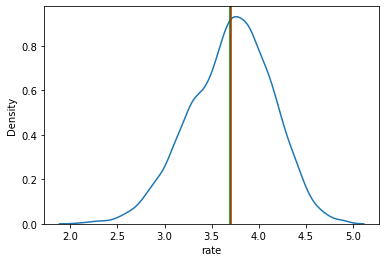

In [16]:
sns.kdeplot(x=df.rate)
plt.axvline(df["rate"].mean(),color="r")
plt.axvline(df["rate"].median(),color="g")
#plt.axvline(df["rate"].mode(),color="b")
plt.show()

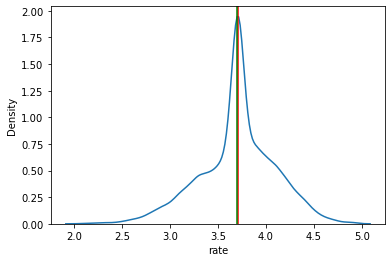

In [17]:
x=df["rate"].fillna(df["rate"].mean())
sns.kdeplot(x)
plt.axvline(df["rate"].mean(),color="r")
plt.axvline(df["rate"].median(),color="g")
#plt.axvline(df["rate"].mode(),color="b")
plt.show()

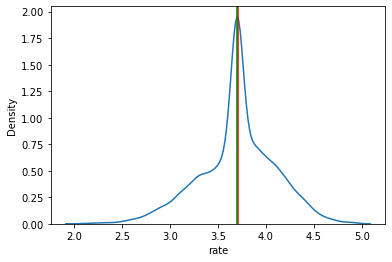

In [18]:
x=df["rate"].fillna(df["rate"].median())
sns.kdeplot(x)
plt.axvline(df["rate"].mean(),color="r")
plt.axvline(df["rate"].median(),color="g")
#plt.axvline(df["rate"].mode(),color="b")
plt.show()

In [19]:
# Replace nan with median if we replace values with np.nan instead of 0
df['rate'].fillna(df['rate'].median(),inplace=True)

In [20]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR


### Dealing with approx_cost(for two people)

In [21]:
df['approx_cost(for two people)'].unique()

array(['500', '1,700', '600', '400', '350', '200', '2,600', '300', '700',
       '150', '1,400', '1,200', '800', '900', '250', '650', '2,000',
       '100', '2,800', '1,000', '450', '750', '950', '1,500', '850',
       '550', '1,300', '1,650', '1,100', '1,600', nan, '2,500', '2,300',
       '2,100', '2,400', '3,000', '70', '1,800', '4,100', '2,200',
       '3,400', '1,900', '1,450', '130', '40', '1,050', '1,350', '180',
       '1,250', '120', '3,500', '230', '469', '199', '6,000', '4,000',
       '80'], dtype=object)

In [22]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [23]:
df["approx_cost(for two people)"] = df["approx_cost(for two people)"].replace({"nan":np.nan})

In [24]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].apply(lambda x:str(x).replace(',',"")).astype("float")

In [25]:
df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mean(),inplace=True)
df['approx_cost(for two people)'].isnull().sum()

0

### Dealing with Phone number 
### Since, we will not be using phone number feature, we will drop the column.

In [26]:
df.drop(columns='phone',inplace=True)

### Dealing with rest_type feature

In [27]:
df['rest_type'].isnull().sum()

47

In [28]:
res_mode=df['rest_type'].mode()
res_mode

0    Quick Bites
dtype: object

In [29]:
df['rest_type'].fillna(res_mode[0],inplace=True)

In [30]:
df.isnull().sum()

index                             0
url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
location                          3
rest_type                         0
dish_liked                     5358
cuisines                          5
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [31]:
### Dealing with cuisine feature
### They are just 5 values, so we are dropping them for now.
df.dropna(axis=0,subset=['cuisines'],inplace=True)

## EDA

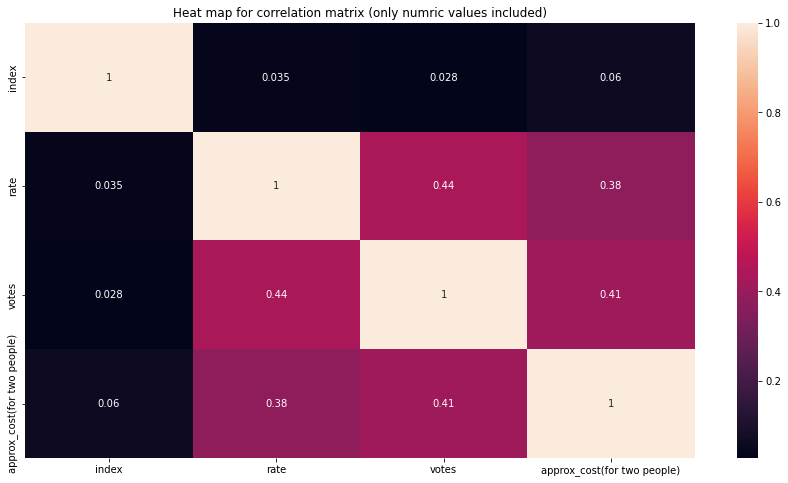

In [32]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Heat map for correlation matrix (only numric values included)")
plt.show()

### <p style=color:#79155B>There are no strongly correlated columns</p>

In [33]:
df.describe()

,index,rate,votes,approx_cost(for two people)
count,9995.000000,9995.000000,9995.000000,9995.000000
mean,25852.884842,3.704962,292.425113,556.524752
std,14968.014256,0.394602,812.659359,432.662646
min,0.000000,2.100000,0.000000,40.000000
25%,12964.000000,3.500000,7.000000,300.000000
50%,26019.000000,3.700000,43.000000,400.000000
75%,38845.000000,3.900000,208.000000,700.000000
max,51716.000000,4.900000,14956.000000,6000.000000


In [34]:
df.describe(include=object)

,url,address,name,online_order,book_table,location,rest_type,dish_liked,cuisines,reviews_list,menu_item,listed_in(type),listed_in(city)
count,9995,9995,9995,9995,9995,9995,9995,4642,9995,9995,9995,9995,9995
unique,9086,5655,4736,2,2,89,82,2561,1747,6304,2024,7,30
top,https://www.zomato.com/bangalore/brew-cafe-btm...,Delivery Only,Cafe Coffee Day,Yes,No,BTM,Quick Bites,Biryani,North Indian,[],[],Delivery,BTM
freq,4,23,18,5942,8749,963,3669,35,522,1450,7617,5068,605


* Column wise value counts

In [35]:
# The address column has 5655 unique values
# The name column has 4736 unique values 
df["address"].nunique()
df["name"].value_counts()

Cafe Coffee Day              18
Onesta                       17
Keventers                    17
SGS Non Veg - Gundu Pulav    16
McDonald's                   16
                             ..
Rufi's Kati Roll              1
MRS Paradise                  1
Cafe Mamma Mia                1
Hotel Food Lands              1
TBC- Sky Lounge               1
Name: name, Length: 4736, dtype: int64

In [36]:
# online order has only 2 categorie 
df["online_order"].value_counts()

Yes    5942
No     4053
Name: online_order, dtype: int64

In [37]:
# book table has only 2 categories
df["book_table"].value_counts()

No     8749
Yes    1246
Name: book_table, dtype: int64

In [38]:
# The location column has 89 unique values 
df["location"].value_counts()

BTM                      963
Koramangala 5th Block    494
HSR                      483
JP Nagar                 431
Indiranagar              407
                        ... 
Hebbal                     2
Nagarbhavi                 1
West Bangalore             1
Yelahanka                  1
Kengeri                    1
Name: location, Length: 89, dtype: int64

In [39]:
# The restaurant type column has 82 unique values 
df["rest_type"].value_counts()

Quick Bites                  3669
Casual Dining                2017
Cafe                          712
Delivery                      499
Dessert Parlor                443
                             ... 
Food Court, Beverage Shop       1
Bar, Pub                        1
Casual Dining, Lounge           1
Quick Bites, Meat Shop          1
Bakery, Sweet Shop              1
Name: rest_type, Length: 82, dtype: int64

In [40]:
# The dish liked column has 256 unique values 
df["dish_liked"].value_counts()

Biryani                                                                       35
Chicken Biryani                                                               18
Friendly Staff                                                                18
Coffee                                                                        15
Waffles                                                                       10
                                                                              ..
Thick Shakes, Rasmalai, Milk Shake                                             1
Litti, Liti Chokha, Lassi, Tea, Paratha, Thali, Chai                           1
Vegetable Biryani, Dum Biryani, Kheer                                          1
Coffee, Cappuccino, Sandwich, Tiramisu, Hot Chocolate, Pasta, Fries            1
Fish, Peri Peri Chicken, Cocktails, Chilli Chicken, Nachos, Burgers, Pasta     1
Name: dish_liked, Length: 2561, dtype: int64

In [41]:
# The cuisines column has 1747 unique values 
df["cuisines"].value_counts()

North Indian                     522
North Indian, Chinese            451
South Indian                     363
Bakery, Desserts                 199
Biryani                          159
                                ... 
Juices, Beverages, Salad           1
Modern Indian, North Indian        1
Bakery, Juices, Fast Food          1
Arabian, BBQ, Rolls, Lebanese      1
Chinese, Street Food, Rolls        1
Name: cuisines, Length: 1747, dtype: int64

In [42]:
# 1450 is the count for empty reviews,there are 6304 review list unique values
df["reviews_list"].nunique()

6304

In [43]:
# 7617 entries are empty i.e [] for menu items, there are 2024 menu item unique values 
df["menu_item"].nunique()

2024

In [44]:
# There are 7 types of restaurants listed in Bangalore
df["listed_in(type)"].value_counts()

Delivery              5068
Dine-out              3377
Desserts               704
Cafes                  323
Drinks & nightlife     212
Buffet                 169
Pubs and bars          142
Name: listed_in(type), dtype: int64

C:\Users\dhind\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


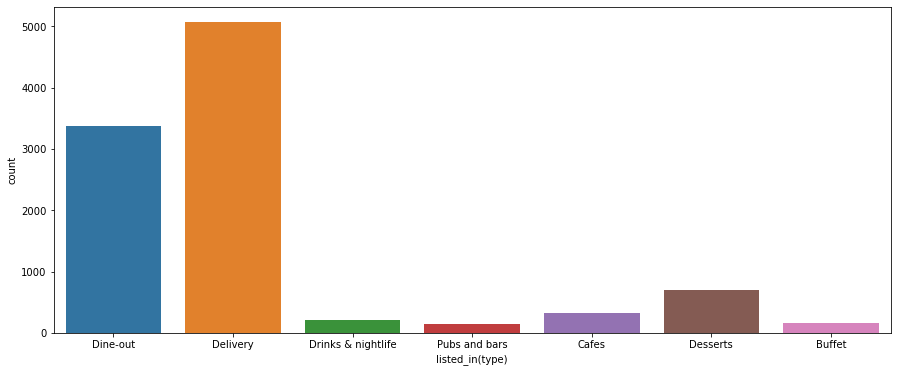

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(df["listed_in(type)"])
plt.show()

In [46]:
# There are 30 unique locations listed in Bangalore
df["listed_in(city)"].nunique()

30

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>2. Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [47]:
top_chains=df["name"].value_counts().head(10)

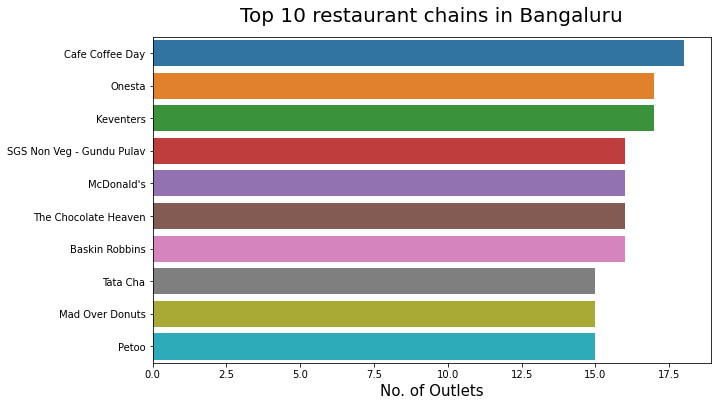

In [48]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_chains,y=top_chains.index)
plt.title("Top 10 restaurant chains in Bangaluru",size=20,pad=15)
plt.xlabel("No. of Outlets",size=15)
plt.show()

### Cafe Coffee Day is the top restaurant chain based on the number of restaurants in Bengaluru.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>3. How many restaurants do not accept online orders?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [49]:
# All the restaurants that do not accept online orders (for all franchise)
#df["online_order"].value_counts()[1]
df[df.online_order=="No"].count()[0]
print("Unique restaurants that do not accept online order: ",df[df.online_order=="No"].count()[0])

Unique restaurants that do not accept online order:  4053


### 4053 restaurants do not accept online orders

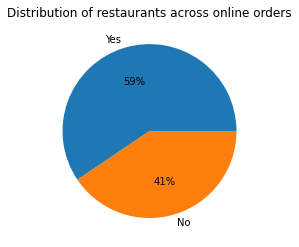

In [50]:
x=df["online_order"].value_counts()
plt.pie(x, labels=x.index, autopct='%.0f%%')
plt.title('Distribution of restaurants across online orders')
plt.show() 

### 41% restaurants do not provide online orders

In [50]:
# Unique restaurant names
df[df.online_order=="No"]["name"].value_counts().index

Index(['Truffles', 'Lakeview Milkbar', 'Apsara Ice Cream', 'Rolls On Wheels',
       'Market Table', 'i-Bar - The Park Bangalore', 'Best Biryani',
       'California Burrito', 'Me And My Cake', 'SkyDeck By Sherlock's',
       ...
       'Court Cafe', 'R.K Biryani & Chinese Fast Food', 'The Original Bistro',
       'Paper Cup Cafe', 'Sri Sai Ram's', 'Cafe Mamma Mia', 'MRS Paradise',
       'Rufi's Kati Roll', 'Basawa Hotel', 'Tawa Sagara'],
      dtype='object', length=2364)

In [51]:
print("Count of unique franchise that do not accept online order :",len(df[df.online_order=="No"]["name"].value_counts().index))

Count of unique franchise that do not accept online order : 2364


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>4. What is the ratio b/w restaurants that provide and do not provide table booking?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Method 1: using groupby

In [52]:
print("Ratio between restaurants that provide and do not provide table")
round((df.groupby("book_table")["name"].count()[1]/df.groupby("book_table")["name"].count()[0])*100,2)

Ratio between restaurants that provide and do not provide table


14.24

### Method 2: using value_counts

In [53]:
x=df["book_table"].value_counts()
x[1]/x[0]*100

14.241627614584523

### Ratio between restaurants based on table booking = 14.23

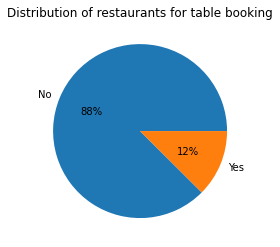

In [54]:
plt.pie(x, labels=x.index, autopct='%.0f%%')
plt.title('Distribution of restaurants for table booking')
plt.show() 

### 88% restaurants do not provide table booking, 12% restaurants provide table booking

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>5. Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [56]:
df["rate"]=df["rate"].apply(lambda x:str(x).split("/")[0]).astype(float)
df.head(5)

,index,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6,45,Residency Road,Lounge,NaN,Finger Food,1700.0,"[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7,36,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600.0,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4,7,KR Puram,Quick Bites,NaN,"Chinese, Thai",400.0,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,3.7,0,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400.0,[],[],Dine-out,JP Nagar


In [57]:
df.isnull().sum()

index                             0
url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
location                          0
rest_type                         0
dish_liked                     5353
cuisines                          0
approx_cost(for two people)       0
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

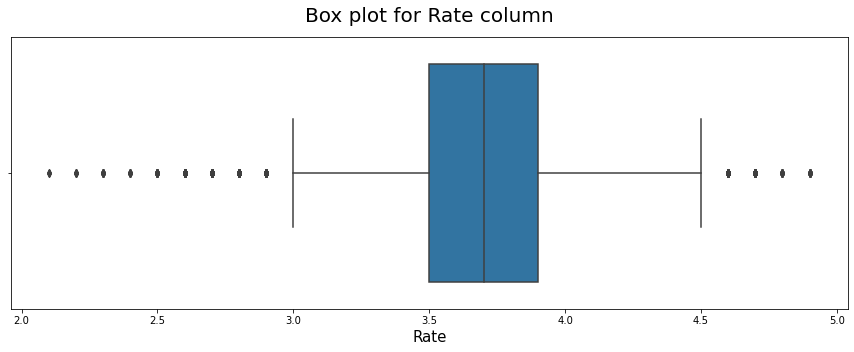

In [58]:
plt.figure(figsize=(15,5))
sns.boxplot(x=df.rate)
plt.title("Box plot for Rate column",size=20,pad=15)
plt.xlabel("Rate",size=15)
plt.show()

In [59]:
df.rate.skew()

-0.2908863335889005

* The rate column is showing outliers on both positive and negative side.
* The range for negative outliers is comparatively longer than positive outliers.
* The median for rate is 3.7
* The rate column is negatively skewed, i.e Left skewed.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>6. Online and Offline orders restaurants percentage.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [60]:
df1=df.groupby("online_order")["name"].count()
df1

online_order
No     4053
Yes    5942
Name: name, dtype: int64

In [61]:
print("Offline orders :",df1[0]/sum(df1)*100)
print("Online orders :",round(df1[1]/sum(df1)*100,2))

Offline orders : 40.55027513756879
Online orders : 59.45


### Method 2: value counts

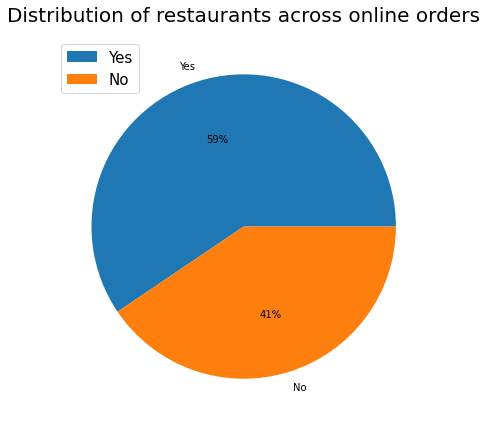

In [62]:
x=df["online_order"].value_counts()
plt.figure(figsize=(10,7))
plt.pie(x, labels=x.index, autopct='%.0f%%')
plt.title('Distribution of restaurants across online orders',size=20,pad=15)
plt.legend(loc=2, prop={'size': 15})
plt.show() 

* 59 % of the restaurants allow online orders, 41 % do not provide the option to order online

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>7. Plot the scatter plot using the Cost vs rating variable with respect to online order. Use apply the function Or other function to remove the “,”.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
df["approx_cost(for two people)"]=df["approx_cost(for two people)"].apply(lambda x:str(x).replace(',',"")).astype("float")

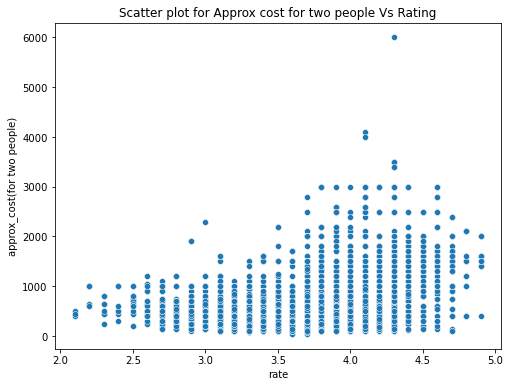

In [64]:
plt.figure(figsize=(8,6))
sns.scatterplot(y=df["approx_cost(for two people)"],x=df["rate"])
plt.title("Scatter plot for Approx cost for two people Vs Rating")
plt.show()

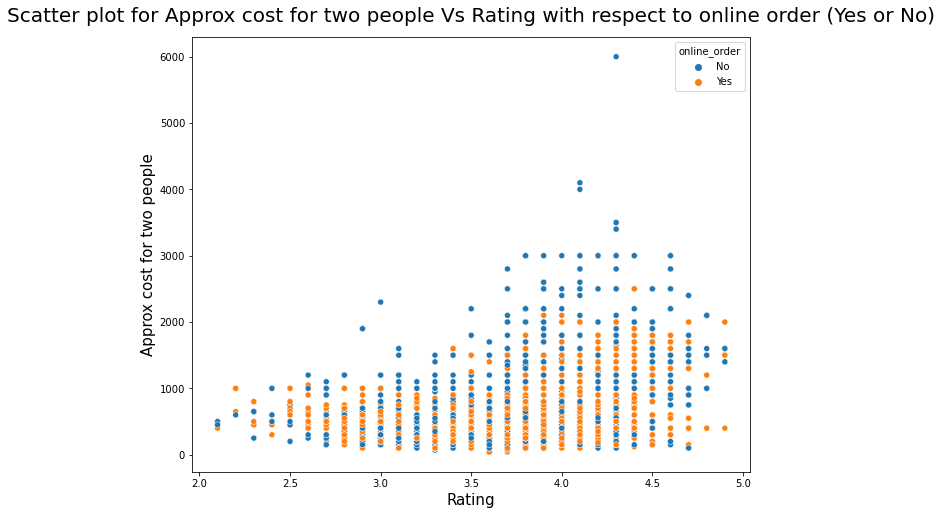

In [65]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['rate'],y=df['approx_cost(for two people)'],hue=df['online_order'])
plt.title("Scatter plot for Approx cost for two people Vs Rating with respect to online order (Yes or No)",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Approx cost for two people',size = 15)
plt.show()

### Scatter plot inferences:
* The scatter plot shows most of the values for approx cost between 0-3000 and rate between 3 to 4.5
* There is not much difference in trend for yes or no values for online orders.

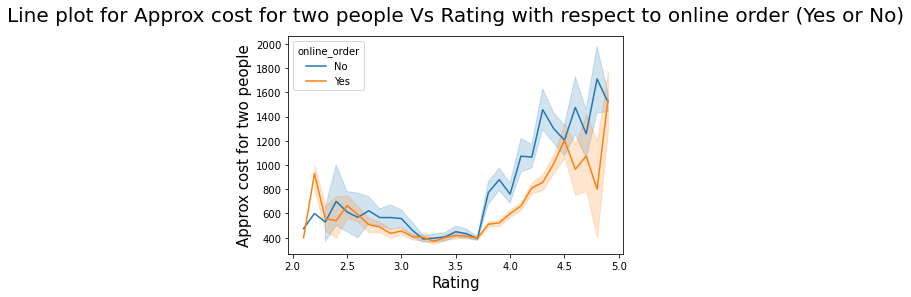

In [66]:
sns.lineplot(x=df['rate'],y=df['approx_cost(for two people)'],hue=df['online_order'])
plt.title("Line plot for Approx cost for two people Vs Rating with respect to online order (Yes or No)",size=20,pad=15)
plt.xlabel('Rating',size = 15)
plt.ylabel('Approx cost for two people',size = 15)
plt.show()

### Line plot:
* From the line plot we can see that rate and approx cost follow a similar trend for online orders

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>8.	Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
def func_dis(data):
    '''
    print("KDE plots")
    for i in data.columns:
        sns.kdeplot(data[i])
        plt.show()
    
    print("Histogram plots")
    for i in data.columns:
        sns.histplot(data[i])
        plt.show()
    '''    
    print("Violin plot")
    for i in data.columns:
        sns.violinplot(data[i])
        plt.show()
    
    print("Distribution plot") 
    for i in data.columns:
        sns.distplot(data[i])
        plt.show()
        
    print("Pair plot")
    sns.pairplot(data)
    plt.show()
    
    print("Skewness")
    print(data.skew())

Violin plot


C:\Users\dhind\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


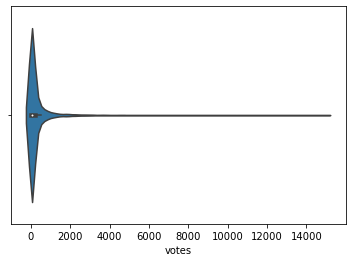

C:\Users\dhind\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


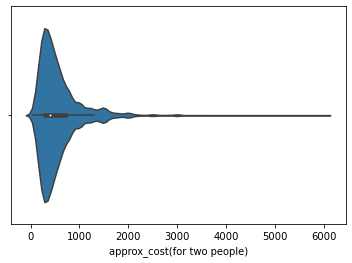

C:\Users\dhind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Distribution plot


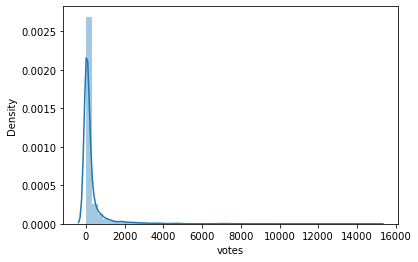

C:\Users\dhind\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


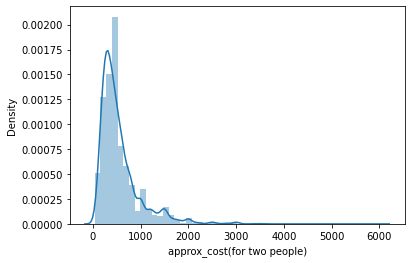

Pair plot


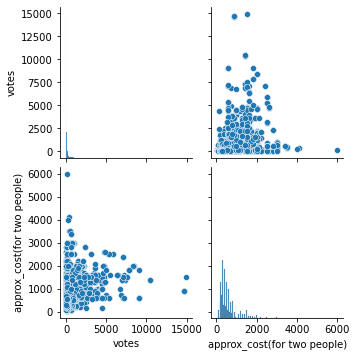

Skewness
votes                          7.006915
approx_cost(for two people)    2.488142
dtype: float64


In [68]:
func_dis(df[["votes",'approx_cost(for two people)']])

* approx cost and votes both are right skewed

C:\Users\dhind\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


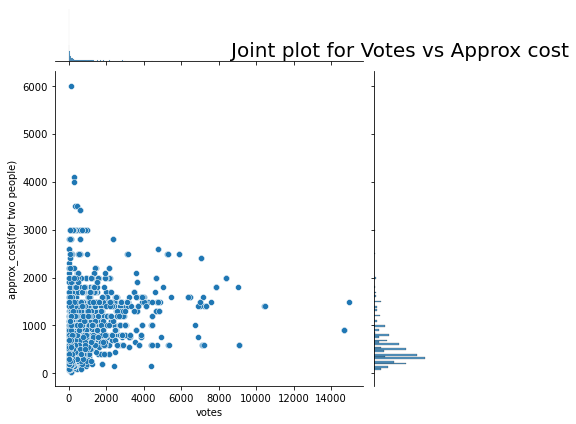

In [69]:
sns.jointplot(df["votes"],df['approx_cost(for two people)'])
plt.title("Joint plot for Votes vs Approx cost",size=20,pad=15)
plt.xlabel('Votes',size = 15)
plt.ylabel('Approx cost for two people',size = 15)
plt.show()

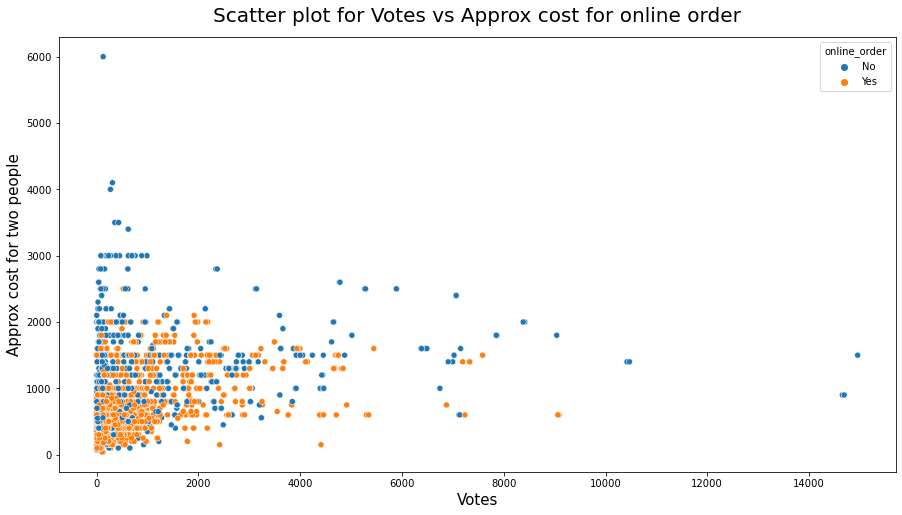

In [70]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['votes'],y=df['approx_cost(for two people)'],hue=df['online_order'])
plt.title("Scatter plot for Votes vs Approx cost for online order",size=20,pad=15)
plt.xlabel('Votes',size = 15)
plt.ylabel('Approx cost for two people',size = 15)
plt.show()

* The values are clustered for votes between 0 to 2000 and approx cost between 0-2000. 
* There are a few outlier values for votes above 10000
* There are a few outlier values for approx cost above 2000
* We can infer that majority restaurants having approx cost between 0-2000 have votes between 0-2000

func iterate on columns
indivitual histogram, kde
regression /join plot/ hex
switch axis
one with kde

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>9. Which are the most common restaurant type in Bangalore?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Method 1: value_counts

In [71]:
x=df["rest_type"].value_counts().head(10)
x

Quick Bites           3669
Casual Dining         2017
Cafe                   712
Delivery               499
Dessert Parlor         443
Takeaway, Delivery     442
Bakery                 228
Casual Dining, Bar     205
Beverage Shop          150
Bar                    134
Name: rest_type, dtype: int64

### Method 2: mode

In [72]:
df["rest_type"].mode()

0    Quick Bites
dtype: object

### Qucik Bites is the most common restaurant type in Bangalore

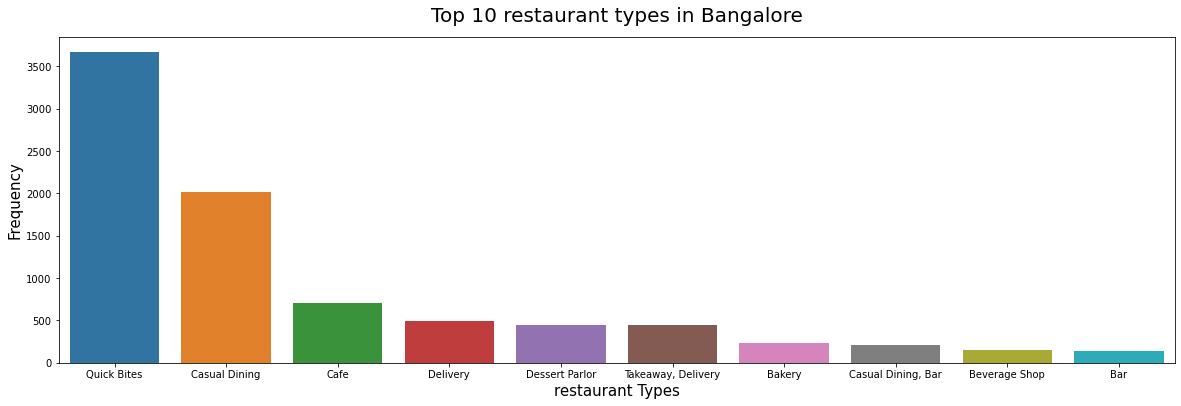

In [73]:
x=df['rest_type'].value_counts()[:10]
plt.figure(figsize=(20,6))
sns.barplot(y=x,x=x.index)
plt.title("Top 10 restaurant types in Bangalore",size=20,pad=15)
plt.xlabel("restaurant Types",size=15)
plt.ylabel("Frequency",size=15)
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>10.	Is there any difference b/w the votes of restaurants accepting and not accepting online orders?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

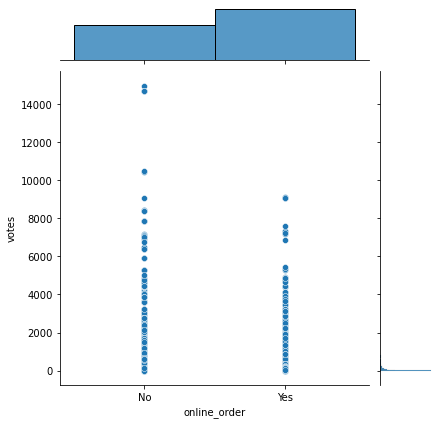

In [74]:
sns.jointplot(x=df['online_order'],y=df['votes'])
plt.show()

* At first glance the "Yes" clearly has a greater count than "No"

In [75]:
pd.crosstab(df["votes"],df["online_order"]).head(5)

online_order,No,Yes
votes,,
0,1272,603
1,1,1
2,1,2
4,143,74
5,82,63


### Considering the total votes, based on online order categories, we can understand which categaory got more votes, Yes or no

In [76]:
a=df.groupby('online_order')['votes'].sum()
print('the difference is ',a.loc['Yes']-a.loc['No'])
print('the difference is ',a.loc['Yes']>a.loc['No'])
a

the difference is  668179
the difference is  True


online_order
No     1127305
Yes    1795484
Name: votes, dtype: int64

* Online order, Yes has a greater total than No, showing that there are more votes for restaurants providing online orders, while less number of votes for restaurants that do not provide online orders.

In [77]:
print("Percentage of Yes to online order votes : ",round(a.loc['Yes']/df.votes.sum()*100,2))
print("Percentage of No to online order votes : ",round(a.loc['No']/df.votes.sum()*100,2))

Percentage of Yes to online order votes :  61.43
Percentage of No to online order votes :  38.57


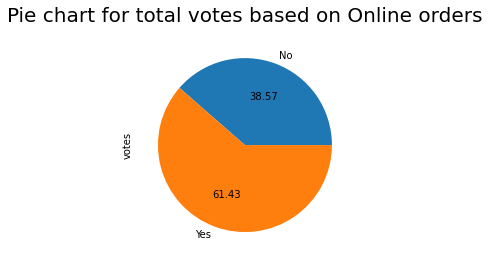

In [78]:
df.groupby("online_order")["votes"].sum().plot(kind="pie",autopct="%.2f")
plt.title("Pie chart for total votes based on Online orders",size=20,pad=15)
plt.show()

In [79]:
a=df.groupby('online_order')['votes'].mean()
print(a.loc['Yes']>a.loc['No'])

True


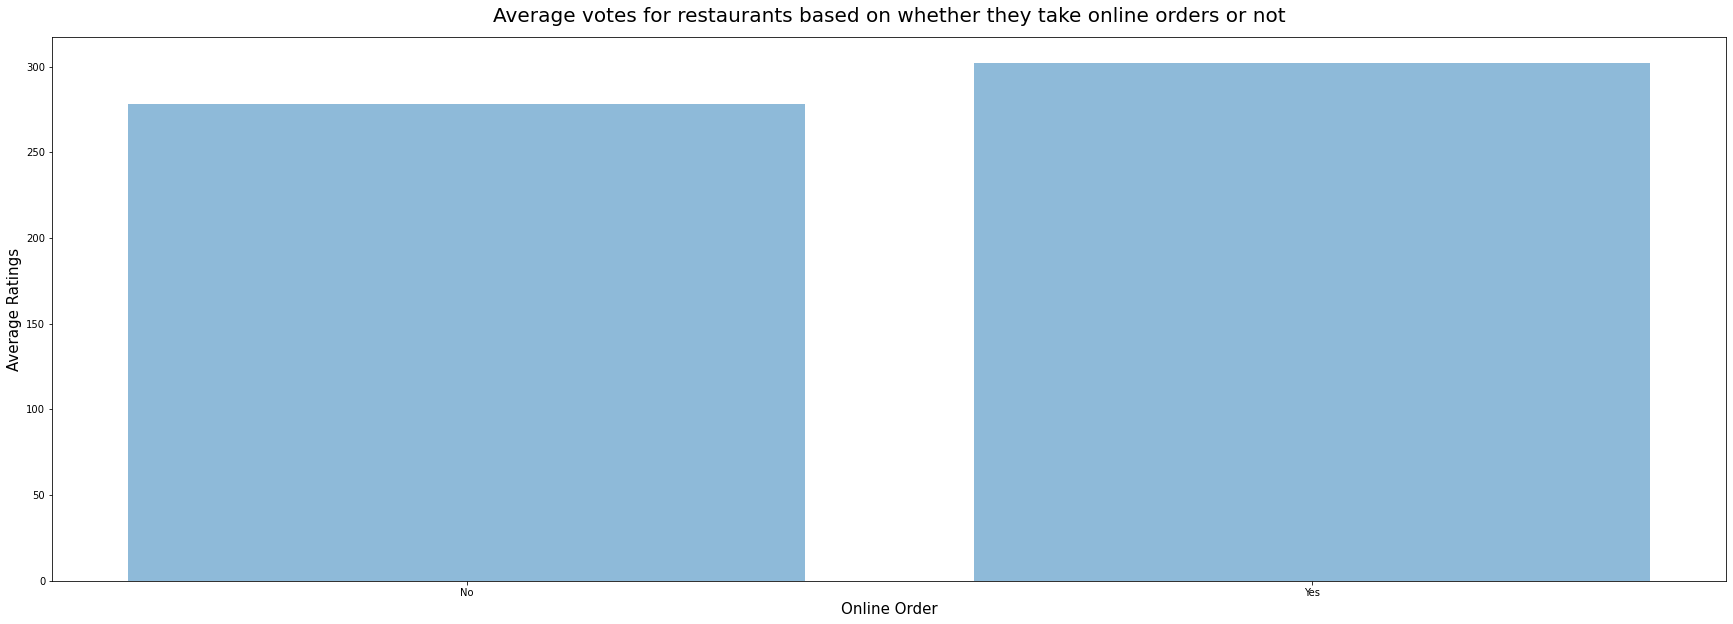

In [80]:
x=df.groupby('online_order')['votes'].mean().reset_index()
plt.figure(figsize=(30,10))
plt.bar(x['online_order'],x['votes'],alpha=0.5)
plt.title('Average votes for restaurants based on whether they take online orders or not',size=20,pad=15)
plt.xlabel('Online Order',size=15)
plt.ylabel('Average Ratings',size=15)
plt.show()

* Average votes restaurants providing online orders is relatively greater than average votes for restaurants that do not provide online orders.

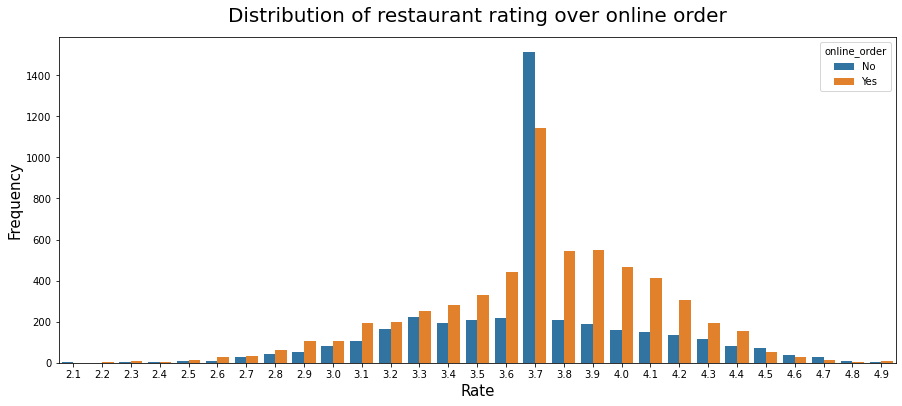

In [81]:
plt.figure(figsize=(15,6))
sns.countplot(hue =df["online_order"], x = df["rate"])
plt.title("Distribution of restaurant rating over online order",size=20,pad=15)
plt.xlabel("Rate",size=15)
plt.ylabel("Frequency",size=15)
plt.show()

### Another method that can be used to find the relation between votes and online order is to consider only restaurants that have votes as 0. Since these places didn't manage to get a vote at all, we can consider these restaurants only to find the difference.

In [82]:
df1=df[(df["votes"]==0) & (df["online_order"])]
df2=df[~(df["votes"]==0) & (df["online_order"])]
df2.online_order.value_counts()

Yes    5339
No     2781
Name: online_order, dtype: int64

In [83]:
df1.online_order.value_counts()

No     1272
Yes     603
Name: online_order, dtype: int64

In [84]:
ratio_no=round(df1.online_order.value_counts()[0]/df2.online_order.value_counts()[1]*100,2) # Number of 0 votes/number of non zero votes for No

In [85]:
ratio_yes=round(df1.online_order.value_counts()[1]/df2.online_order.value_counts()[0]*100,2) # Number of 0 votes/number of non zero votes for Yes

In [86]:
print("% of restaurants that do not provide online orders that got 0 votes : ",ratio_no)
print("% of restaurants that provide online orders that got 0 votes : ",ratio_yes)

% of restaurants that do not provide online orders that got 0 votes :  45.74
% of restaurants that provide online orders that got 0 votes :  11.29


In [87]:
print("% of restaurants that got 0 votes and do not provide online orders considering all the restaurants : ",round(df1.online_order.value_counts()[0]/len(df)*100,2))
print("% of restaurants that got 0 votes and provide online orders considering all the restaurants : ",round(df1.online_order.value_counts()[1]/len(df)*100,2))

% of restaurants that got 0 votes and do not provide online orders considering all the restaurants :  12.73
% of restaurants that got 0 votes and provide online orders considering all the restaurants :  6.03


* We can infer that restaurants that got more number of 0 votes, are the restaurants that do not provide online orders
* Restaurants that provide online orders have less number of 0 votes
* Out of all the restaurants that provide online orders 11.29 % got 0 votes
* Out of all the restaurants that donot provide online orders 45.74 % got 0 votes
* Out of all the restaurants, the restaurants that got 0 votes and do not provide online order is 12.73 %
* Out of all the restaurants, the restaurants that got 0 votes and provide online order is 6.03 %

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>11.	Which are the most common restaurant type in Bangalore?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [88]:
df["rest_type"].value_counts().head(10)

Quick Bites           3669
Casual Dining         2017
Cafe                   712
Delivery               499
Dessert Parlor         443
Takeaway, Delivery     442
Bakery                 228
Casual Dining, Bar     205
Beverage Shop          150
Bar                    134
Name: rest_type, dtype: int64

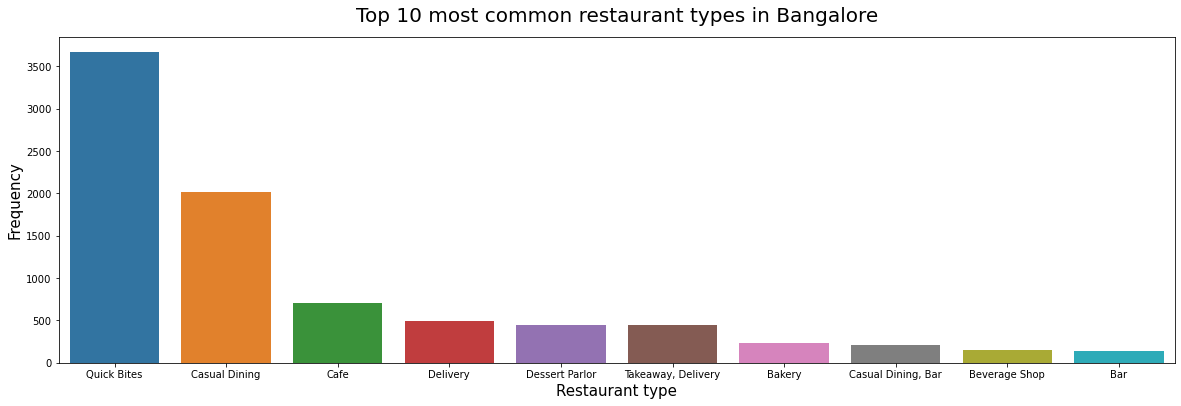

In [89]:
x=df['rest_type'].value_counts()[:10]
plt.figure(figsize=(20,6))
sns.barplot(y=x,x=x.index)
plt.title("Top 10 most common restaurant types in Bangalore",size=20,pad=15)
plt.xlabel("Restaurant type",size=15)
plt.ylabel("Frequency",size=15)
plt.show()

* Top 3 most common restruant types in Bangalore:
1. Quick Bites           
2. Casual Dining         
3. Cafe

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>12.	Find the Best budget Restaurants in any location.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### For all the locations

In [90]:
# Best budget limit cost=1000 and rating>3
df_new=df[(df['rate']>df.rate.median()) & (df['approx_cost(for two people)']<=1000) & (df['votes']>=df.votes.median())]
df_new.head()

,index,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5,15103,https://www.zomato.com/bangalore/patisserie-ni...,"12, 2nd Cross, Hutchins Road, Off Davis Road, ...",Patisserie Nitash,No,No,4.2,142,Frazer Town,Bakery,"Patisserie Nitash, Brownie, Chocolate Cake, Ch...",Bakery,500.0,"[('Rated 5.0', ""RATED\n What if I told you th...",[],Delivery,Frazer Town
15,21345,https://www.zomato.com/bangalore/sri-guru-kott...,"49/1, Subbaraoshetty Road, Netkallappa Circle,...",Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,564,Basavanagudi,Quick Bites,"Benne Dosa, Mirchi Bajji, Filter Coffee, Poha,...",South Indian,150.0,"[('Rated 5.0', 'RATED\n I have been going to ...","['Benne Dose', 'Benne Kali Dose', 'Open Dose',...",Dine-out,Jayanagar
18,2632,https://www.zomato.com/bangalore/andhra-ruchul...,"1319, 100 Feet Road, 2nd Phase, JP Nagar, Bang...",Andhra Ruchulu,Yes,Yes,4.2,1428,JP Nagar,Casual Dining,"Paneer Tikka, Bhuna Gosht, Andhra Meal, Chicke...","Andhra, North Indian",800.0,"[('Rated 4.0', 'RATED\n An authentic Andhra c...",[],Delivery,Basavanagudi
21,17013,https://www.zomato.com/bangalore/vintage-shack...,"1081, First Floor, 18th Cross, 14th Main, Sect...",Vintage Shack,Yes,Yes,3.9,161,HSR,"Casual Dining, Lounge","Panna Cotta, Murgh Makhani, Pasta, Lemonade, C...","North Indian, Continental",900.0,"[('Rated 4.0', ""RATED\n This is s really nice...",[],Dine-out,HSR
27,36606,https://www.zomato.com/bangalore/kebarbiq-kora...,"7, Hosur Main Road, Opposite Forum Mall, Koram...",Kebarbiq,No,No,4.0,138,Koramangala 7th Block,Casual Dining,"Burgers, Pulpy Grape Juice, Chicken Wings, Pit...","North Indian, Arabian, Mughlai, Middle Eastern...",800.0,"[('Rated 4.0', ""RATED\n Small cozy place on t...",[],Dine-out,Koramangala 7th Block


### For specific locations

In [256]:
def return_budget(location):
    budget = df[(df['rate']>df["rate"].median()) & 
                (df['approx_cost(for two people)']<=1000) & 
                (df['votes']>=df.votes.median()) & 
                (df['location']==location)].sort_values(by=["rate",'approx_cost(for two people)',"votes"],ascending=False)
    return budget['name'].unique()[:10]

In [257]:
return_budget('Banashankari')

array(['Taaza Thindi', 'Onesta', 'Ayodhya Upachar', 'Peppy Peppers',
       'Szechuan Dragon', 'Mojo Pizza - 2X Toppings', 'Cafe Shuffle',
       'The Coffee Shack', 'Mini Punjabi Dhaba', 'Spice Elephant'],
      dtype=object)

* For Banashankari location the best budget restaurants are:
['BOX8- Desi Meals', 'San Churro Cafe', 'Roving Feast', 'The Krishna Grand', '1947', 'Spice Elephant', 'Peppy Peppers', 'Jalsa', 'Messy Bowl', 'KFC']

In [253]:
for i in df.location.unique():
    print(i," : ",return_budget(i),end="\n")

Electronic City  :  ["Kittu's" 'Behrouz Biryani' 'Frozen Bottle' 'Doof' 'Cafe Palnad'
 'Notebook Food Court' 'Sri Pillaiyar Bhavan' 'Lassi Adda' 'KFC'
 'Godavari Delights']
Residency Road  :  ['Art of Delight' 'Corner House Ice Cream' 'Nagarjuna' 'Meghana Foods'
 'Green Onion' 'Japan Travel Cafe Azuki' 'Green Theory'
 'Amber Rush Restobar' 'Pashto' 'The Good Grain']
HSR  :  ['TBC Sky Lounge' 'Baar Union' 'Here & Now' 'XO Belgian Waffle'
 'Apsara Ice Cream' 'Onesta' 'Corner House Ice Cream' 'Kitchen On Table'
 'Sector 7 CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©'
 'Birinz']
KR Puram  :  []
JP Nagar  :  ['Onesta' 'Chulha Chauki Da Dhaba' 'Momo Jojo' 'Dream a Dozen'
 'Apsara Ice Cream' 'Dr. Sheesha' 'Andhra Ruchulu' "Mani's Dum Biryani"
 'Crafted Plate' 'Polar Bear']
Frazer Town  :  ['Karama Restaurant' 'The Sugar Fairy' 'Patisserie Nitash'
 'Savoury Restaurant' 'Cafe Arabica' 'Sheesh Kebab' 'Happy Belly Bakes'
 "Thom's Bakery" 'Natural Ice Cream' "Bo

Sanjay Nagar  :  ['Firangi Bake' 'Kitchen Katta']
Bommanahalli  :  ['SR Andhra Spicy House']
Shanti Nagar  :  ['The Bangalore Cafe' "Anupam's Coastal Express"
 'A2B - Adyar Ananda Bhavan' 'Desi Vdesi' 'Sreeraj Lassi Bar' "Foody's"]
Banashankari  :  ['Taaza Thindi' 'Onesta' 'Ayodhya Upachar' 'Peppy Peppers'
 'Szechuan Dragon' 'Mojo Pizza - 2X Toppings' 'Cafe Shuffle'
 'The Coffee Shack' 'Mini Punjabi Dhaba' 'Spice Elephant']
HBR Layout  :  ['Coffee Mechanics' 'New Krishna Sagar' 'Aqni' "Amma's Pastries"
 'Yuan Restaurant' 'Zabi']
Lavelle Road  :  ['Tree Tops Bar & Kitchen' "Glen's Bakehouse"
 'GMT - Gelateria Montecatini Terme' 'The Spice Bazaar' 'EatWater'
 'Airlines Hotel' 'Subway' 'Keventers']
Hosur Road  :  ['Litti Twist' 'Sardarji Ka Dhaba' 'Khan Saheb Grills and Rolls']
Banaswadi  :  ['Tamarind - Tamarind Hospitality' 'Mayonaise' 'The Sanctuary'
 'Pizza Stop' 'Noodles' "Thanco's Natural Ice Cream" "Leela's Kitchen"
 'Donne Biriyani Mane' 'Upsouth' "Despiwich Dragon's Kitchen"]
Jal

* Function displays all the locations along with their respective top 10 restruants, based on budget

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>13.	Top quick bites restaurant chains in Bangalore.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Method 1: value counts for Quick Bites

In [94]:
df1=df[df["rest_type"]=="Quick Bites"]
df1["name"].value_counts().head(10)

McDonald's                   16
SGS Non Veg - Gundu Pulav    15
KFC                          15
Taco Bell                    13
Pathaan Sir                  12
Just Shawarma                12
Pizza Stop                   12
Donne Biriyani Mane          11
Ambur Hot Dum Biryani        11
Cravy Wings                  10
Name: name, dtype: int64

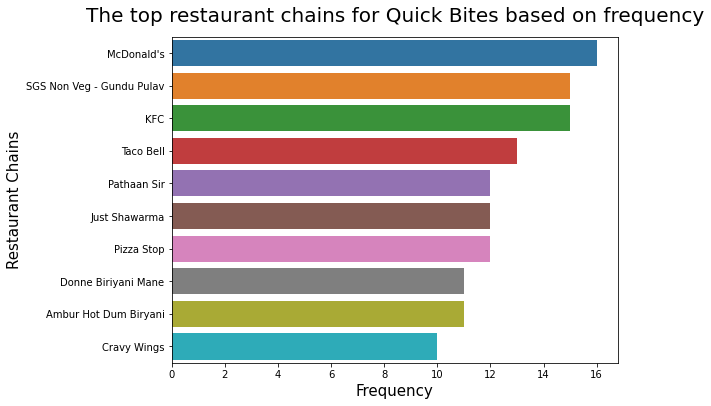

In [95]:
x=df1['name'].value_counts()[:10]
plt.figure(figsize=(8,6))
sns.barplot(x=x,y=x.index)
plt.title("The top restaurant chains for Quick Bites based on frequency",size=20,pad=15)
plt.ylabel("Restaurant Chains",size=15)
plt.xlabel("Frequency",size=15)
plt.show()

* The top three restaurant chains for Quick Bites based on frequency:
1. McDonald's                   
2. SGS Non Veg - Gundu Pulav  
3. KFC 

### Method 2: considering all the restaurants having Quick Bites as rest type, votes and ratings

In [96]:
QuBites=df[(df['rest_type'].str.contains('Quick Bites',case=False, na=False )) 
           & (df['votes']>=df['votes'].median()) & (df['rate']>=df['rate'].median())]

In [97]:
QuBites.name.value_counts()[:10]

Just Shawarma                11
SGS Non Veg - Gundu Pulav    10
Cravy Wings                  10
McDonald's                   10
Kanti Sweets                  9
Taco Bell                     9
Leon Grill                    8
Pathaan Sir                   8
Biggies Burger 'n' More       8
Delite Chaat House            8
Name: name, dtype: int64

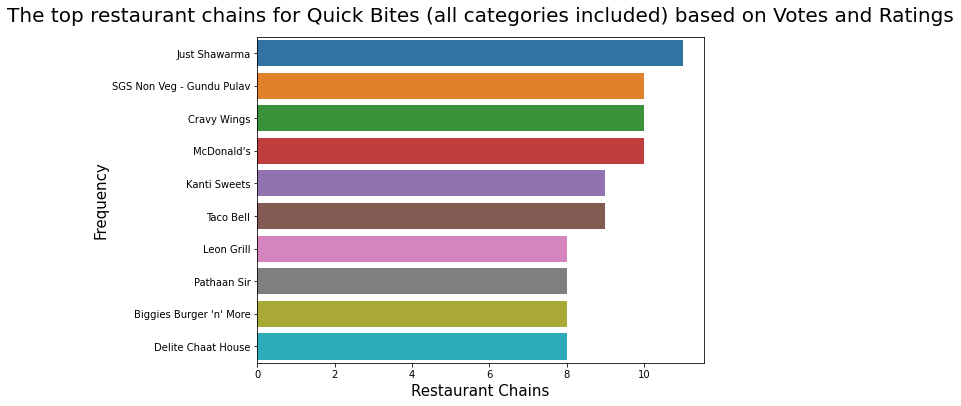

In [98]:
x=QuBites['name'].value_counts()[:10]
plt.figure(figsize=(8,6))
sns.barplot(x=x,y=x.index)
plt.title("The top restaurant chains for Quick Bites (all categories included) based on Votes and Ratings",size=20,pad=15)
plt.xlabel("Restaurant Chains",size=15)
plt.ylabel("Frequency",size=15)
plt.show()

* The top three restaurant chains for Quick Bites (all categories included) based on Votes and Ratings
1. Just Shawarma               
2. SGS Non Veg - Gundu Pulav   
3. Cravy Wings

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>14.	Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### Since we want to find the most popular casual dining restaurants we will be considering the Votes

### Method 1: total votes for Casual Dining restaurant chains

In [99]:
df[df.rest_type=="Casual Dining"].head(2)

,index,url,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2,7,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500.0,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
12,25635,https://www.zomato.com/bangalore/oceans-deligh...,"89/2, 3rd Main, Diagonal Road, Ramaiah Layout,...",Ocean's Delight,No,No,3.4,13,Kammanahalli,Casual Dining,NaN,"Seafood, Biryani, South Indian",700.0,"[('Rated 3.5', ""RATED\n Place is tucked away ...",[],Delivery,Kammanahalli


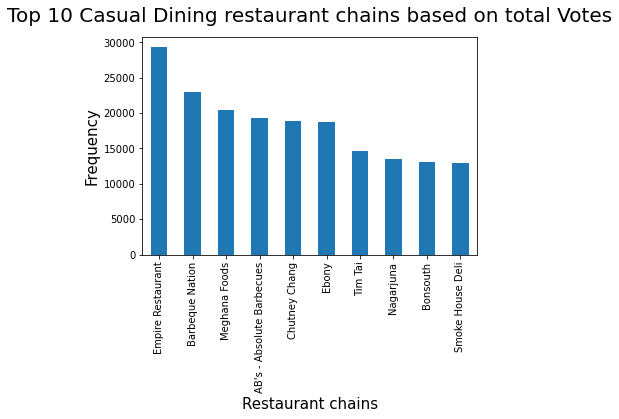

In [100]:
df[df.rest_type=="Casual Dining"].groupby('name')['votes'].sum().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Top 10 Casual Dining restaurant chains based on total Votes",size=20,pad=15)
plt.xlabel("Restaurant chains",size=15)
plt.ylabel("Frequency",size=15)
plt.show()

* Top 3 Casual Dining restaurants based on total votes:
1. Empire Restaurant                               
2. Barbeque Nation                               
3. Meghana Foods

### Method 2: considering restaurant types clubbed with Casual Dining
Since the number of restaurant chains differ, we can consider average votes while considering all the Casual Dining restaurants

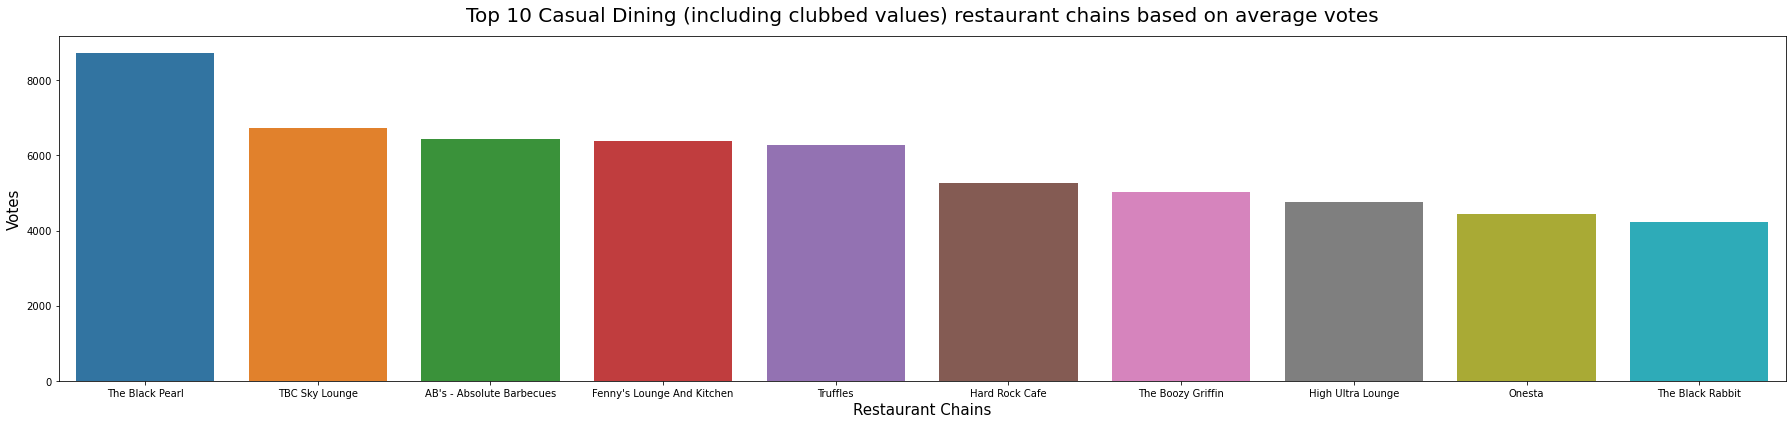

In [101]:
x=df[(df['rest_type'].str.contains('Casual Dining',case=False, na=False ))].groupby('name')["votes"].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(25,6))
sns.barplot(y=x,x=x.index)
plt.title("Top 10 Casual Dining (including clubbed values) restaurant chains based on average votes",size=20,pad=15)
plt.xlabel("Restaurant Chains",size=15)
plt.ylabel("Votes",size=15)
plt.tight_layout()
plt.show()

* Top 3 Casual Dining (including clubbed values) restaurant chains based on average votes:
1. The Black Pearl               
2. TBC Sky Lounge                
3. AB's - Absolute Barbecues  

df[df.rest_type=="Casual Dining"].groupby('name')['votes'].mean().nlargest(10).plot.bar()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>15.	Which are the most popular cuisines of Bangalore using a related plot?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Since we want to find the popular cuisines we will take Votes into consideration

### Method 1: based on frequency

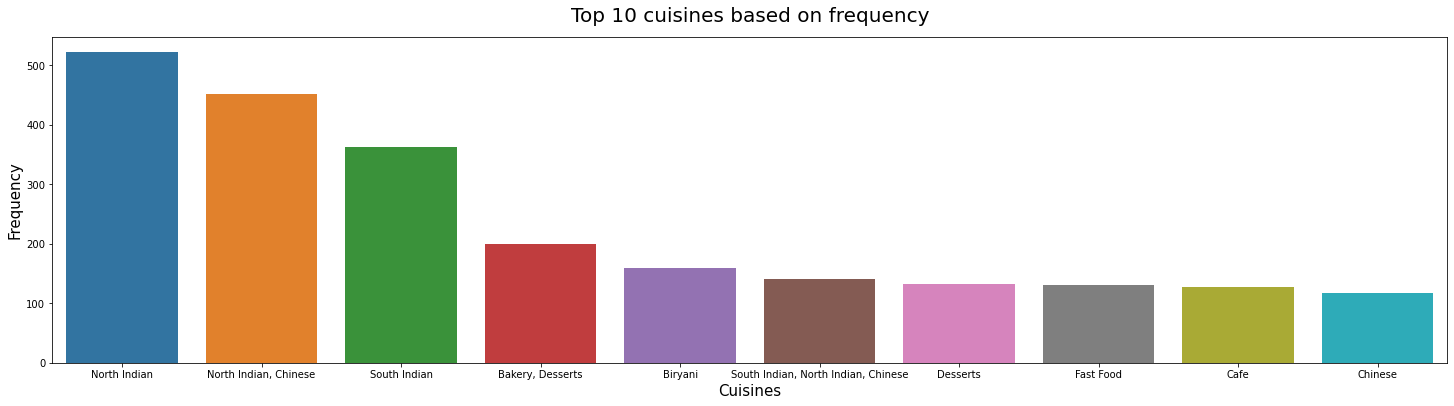

In [102]:
x=df['cuisines'].value_counts()[:10]
plt.figure(figsize=(25,6))
sns.barplot(y=x,x=x.index)
plt.title("Top 10 cuisines based on frequency",size=20,pad=15)
plt.xlabel("Cuisines",size=15)
plt.ylabel("Frequency",size=15)
plt.show()

* Top 5 cuisines based on frequency
1. North Indian                           
2. North Indian, Chinese                  
3. South Indian                           
4. Bakery, Desserts                       
5. Biryani       

### Method 2: total votes

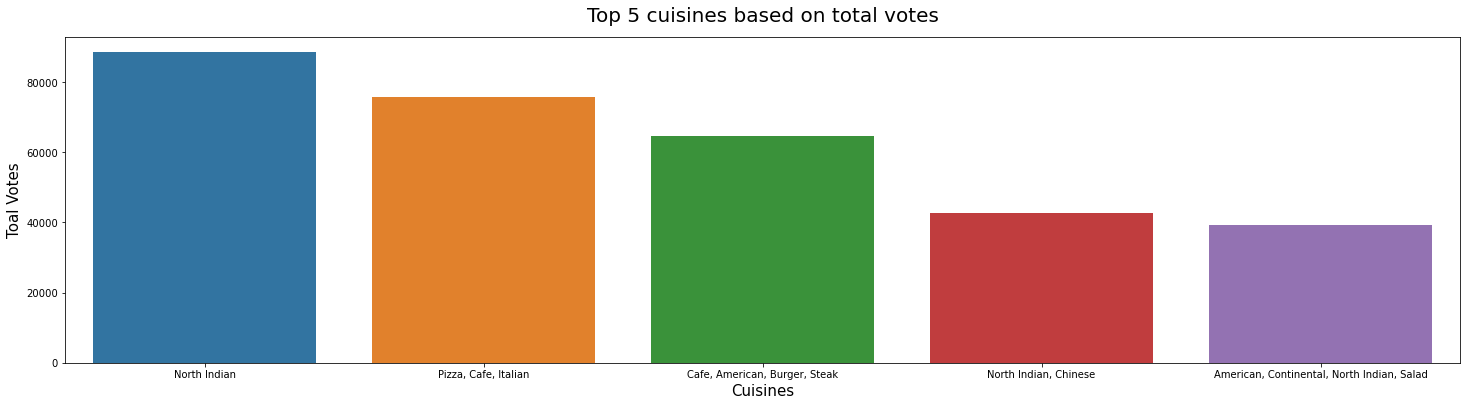

In [103]:
x=df.groupby('cuisines')['votes'].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(25,6))
sns.barplot(y=x,x=x.index)
plt.title("Top 5 cuisines based on total votes",size=20,pad=15)
plt.xlabel("Cuisines",size=15)
plt.ylabel("Toal Votes",size=15)
plt.show()

* Top 5 cuisines based on total votes
1. North Indian                                  
2. Pizza, Cafe, Italian                          
3. Cafe, American, Burger, Steak                 
4. North Indian, Chinese                         
5. American, Continental, North Indian, Salad

### Method 3: based on average votes

Considering average votes since the count for each cusine can differ

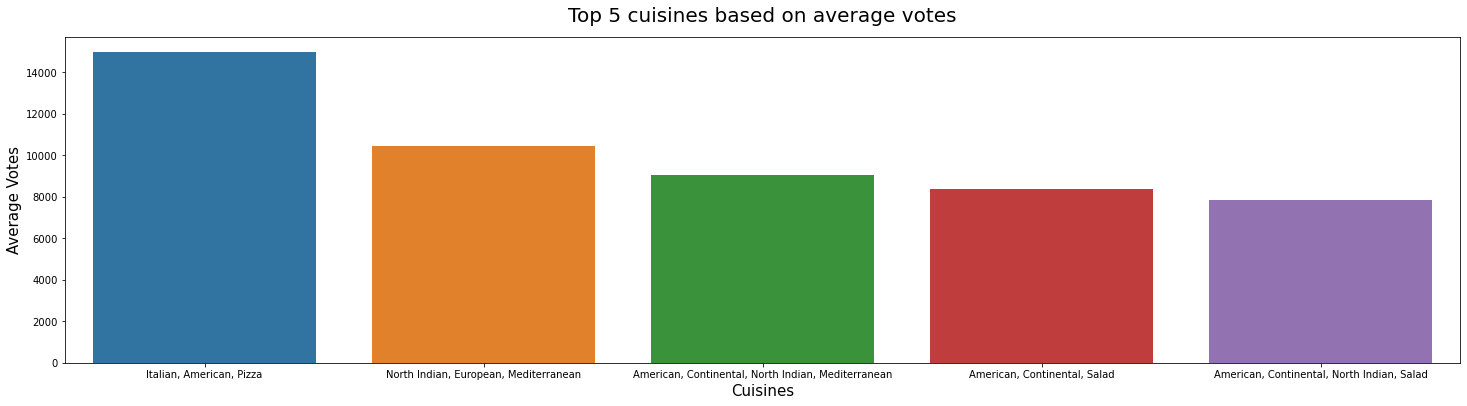

In [104]:
x=df.groupby('cuisines')['votes'].mean().sort_values(ascending=False)[:5]
plt.figure(figsize=(25,6))
sns.barplot(y=x,x=x.index)
plt.title("Top 5 cuisines based on average votes",size=20,pad=15)
plt.xlabel("Cuisines",size=15)
plt.ylabel("Average Votes",size=15)
plt.show()

* Top 5 cuisines based on average votes:
1. Italian, American, Pizza                             
2. North Indian, European, Mediterranean                 
3. American, Continental, North Indian, Mediterranean   
4. American, Continental, Salad                          
5. American, Continental, North Indian, Salad 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>16. Best Restaurant Chain (Top 5) in Bangalore
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Since we want to find the best restaurant chains, we will consider the threshold for Rating More than 4.5.

In [118]:
df["rate"].quantile(0.98) # Top 2% restraunts

4.5

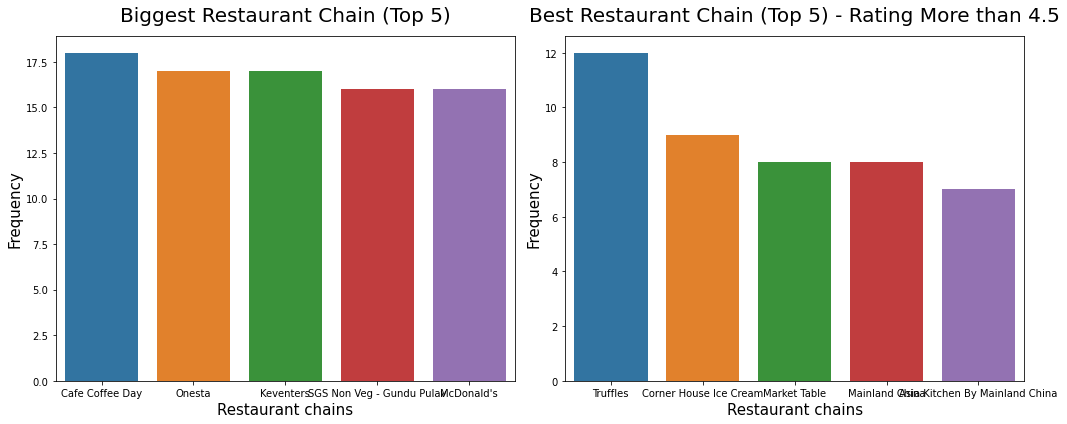

In [119]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
x=df.name.value_counts().head()
sns.barplot(x=x.index,y=x.values)
plt.title("Biggest Restaurant Chain (Top 5)",size=20,pad=15)
plt.xlabel("Restaurant chains",size=15)
plt.ylabel("Frequency",size=15)

plt.subplot(1,2,2)
x=df[df['rate']>=df["rate"].quantile(0.98)]['name'].value_counts().nlargest(5)
sns.barplot(x=x.index,y=x.values)
plt.title("Best Restaurant Chain (Top 5) - Rating More than 4.5",size=20,pad=15)
plt.xlabel("Restaurant chains",size=15)
plt.ylabel("Frequency",size=15)

plt.tight_layout()
plt.show()

* From the plot we can infer that the top 5 biggest restaurant chains in Bangalore are:
1. Cafe Coffee Day              
2. Keventers                   
3. Onesta                      
4. SGS Non Veg - Gundu Pulav   
5. McDonald's  

* From the plot we can inder that the top 5 best restaurant chains in Bangalore are:
1. Truffles                          
2. Corner House Ice Cream             
3. Market Table                       
4. Mainland China                     
5. Asia Kitchen By Mainland China

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>17. Most Expensive restaurants with the approx cost for two people.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
pd.pivot_table(df,index="name",values='approx_cost(for two people)',aggfunc="max").sort_values(by="approx_cost(for two people)",ascending=False).head(5)

,approx_cost(for two people)
name,
Le Cirque Signature - The Leela Palace,6000.0
La Brasserie - Le Meridien,4100.0
Riwaz - The Ritz-Carlton,4000.0
The Lantern Restaurant & Bar - The Ritz-Carlton...,3500.0
Kebabs & Kurries - ITC Gardenia,3500.0


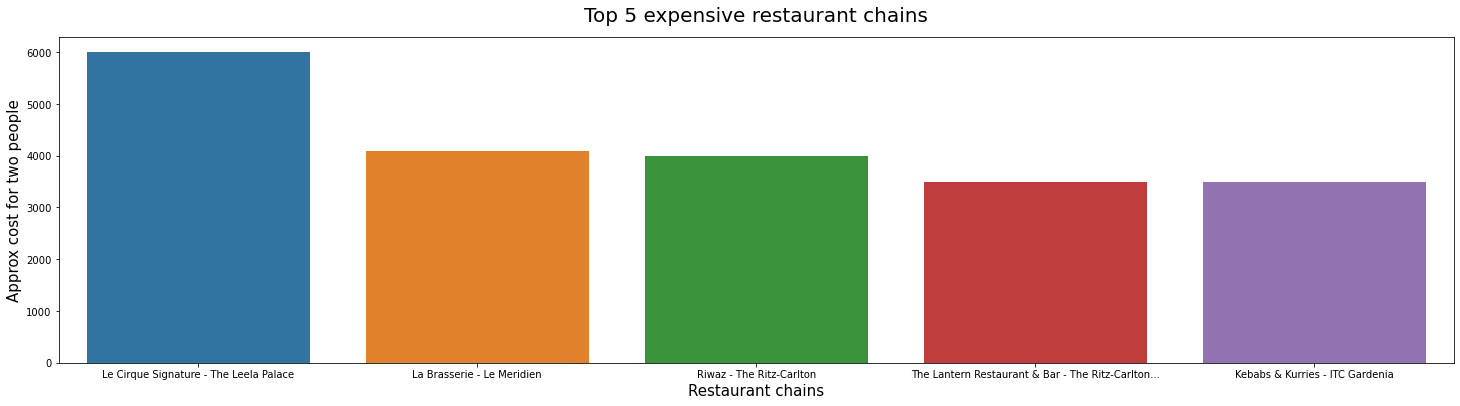

In [107]:
x=df.groupby('name')['approx_cost(for two people)'].max().sort_values(ascending=False)[:5]
plt.figure(figsize=(25,6))
sns.barplot(y=x,x=x.index)
plt.title("Top 5 expensive restaurant chains",size=20,pad=15)
plt.xlabel('Restaurant chains',size = 15)
plt.ylabel('Approx cost for two people',size = 15)
plt.show()

* Top 5 most expensive restaurant chains
1. Le Cirque Signature - The Leela Palace                
2. La Brasserie - Le Meridien                            
3. Riwaz - The Ritz-Carlton                              
4. The Lantern Restaurant & Bar - The Ritz-Carlton...    
5. Kebabs & Kurries - ITC Gardenia   

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>18. Which cuisine do customers like the most?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Considering the ratings to find the favorite cuisines

In [108]:
b=df.groupby('cuisines')['rate'].mean().reset_index().sort_values(by='rate',ascending=False)
b.head(5)

,cuisines,rate
802,"European, Mediterranean, North Indian, BBQ",4.9
138,"Asian, Mediterranean, North Indian, BBQ",4.9
123,"Asian, Chinese, Thai, Momos",4.9
734,"Continental, North Indian, Chinese, European, ...",4.8
1345,"North Indian, European, Mediterranean, BBQ",4.8


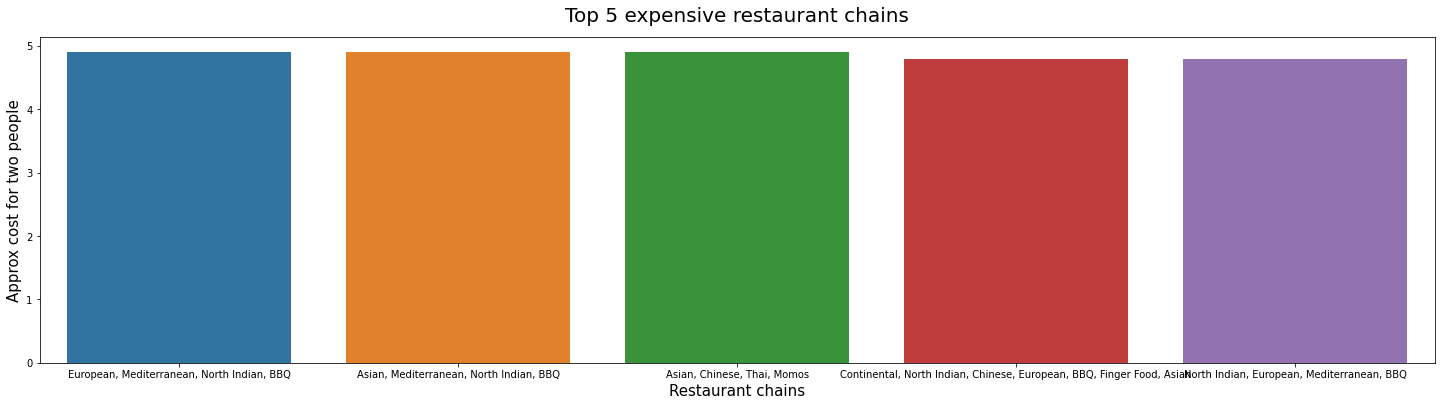

In [172]:
x=df.groupby('cuisines')['rate'].mean().sort_values(ascending=False)[:5]
plt.figure(figsize=(25,6))
sns.barplot(y=x,x=x.index)
plt.title("Top 5 expensive restaurant chains",size=20,pad=15)
plt.xlabel('Restaurant chains',size = 15)
plt.ylabel('Approx cost for two people',size = 15)
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>19. Does the restaurant’s rating depend on whether it accepts online orders or not?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

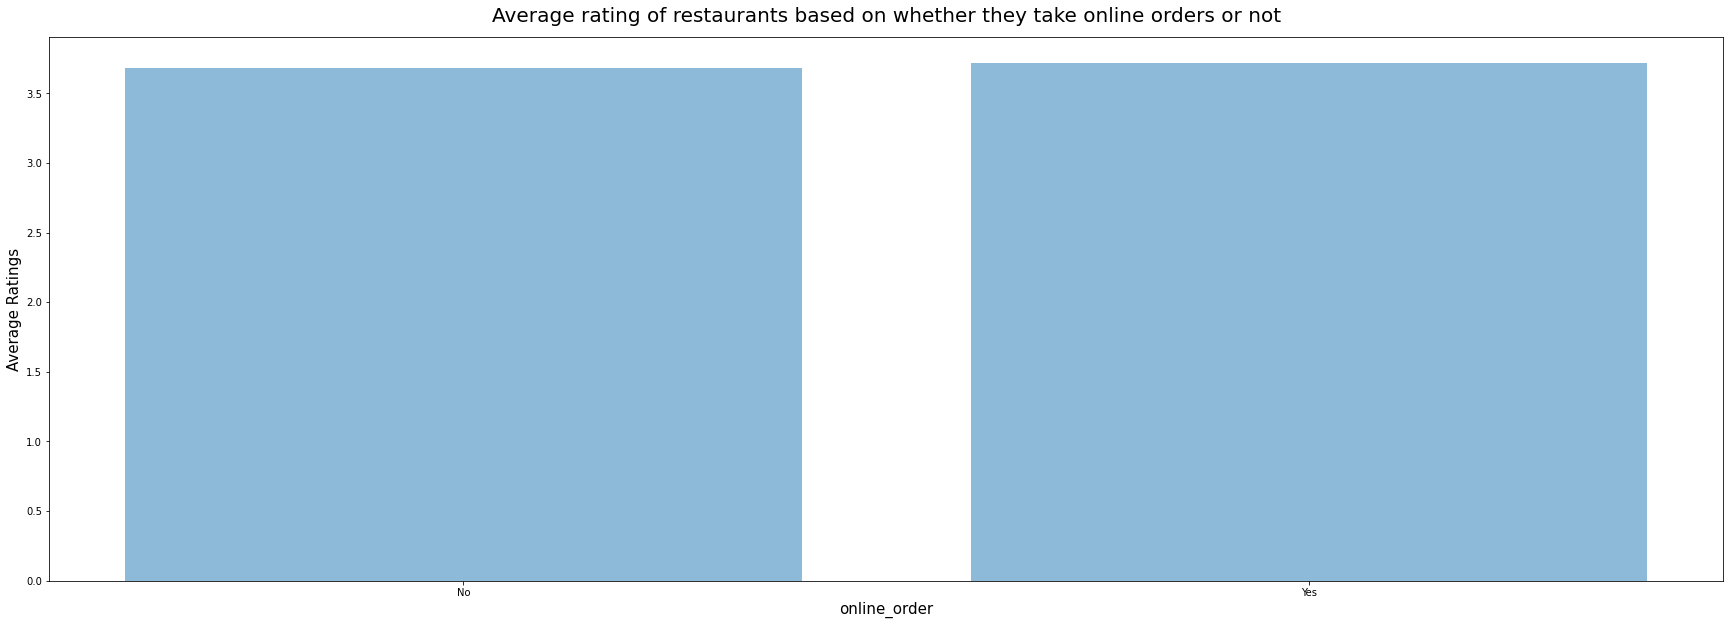

In [120]:
x=df.groupby('online_order')['rate'].mean().reset_index()
plt.figure(figsize=(30,10))
plt.bar(x['online_order'],x['rate'],alpha=0.5)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20,pad=15)
plt.xlabel('online_order',size=15)
plt.ylabel('Average Ratings',size=15)
plt.show()

There is a very slight difference in average ratings for the restaurants based on whether  they take online orders or not. It can be concluded that a restaurant’s success does not largely depend on the facility of taking online orders.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>20. What is the average price for two people based on the listed in type of service?

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

      listed_in(type)  approx_cost(for two people)
3            Desserts                   398.915467
2            Delivery                   468.316830
4            Dine-out                   589.296207
1               Cafes                   638.140766
0              Buffet                  1284.357924
6       Pubs and bars                  1343.753367
5  Drinks & nightlife                  1434.700420


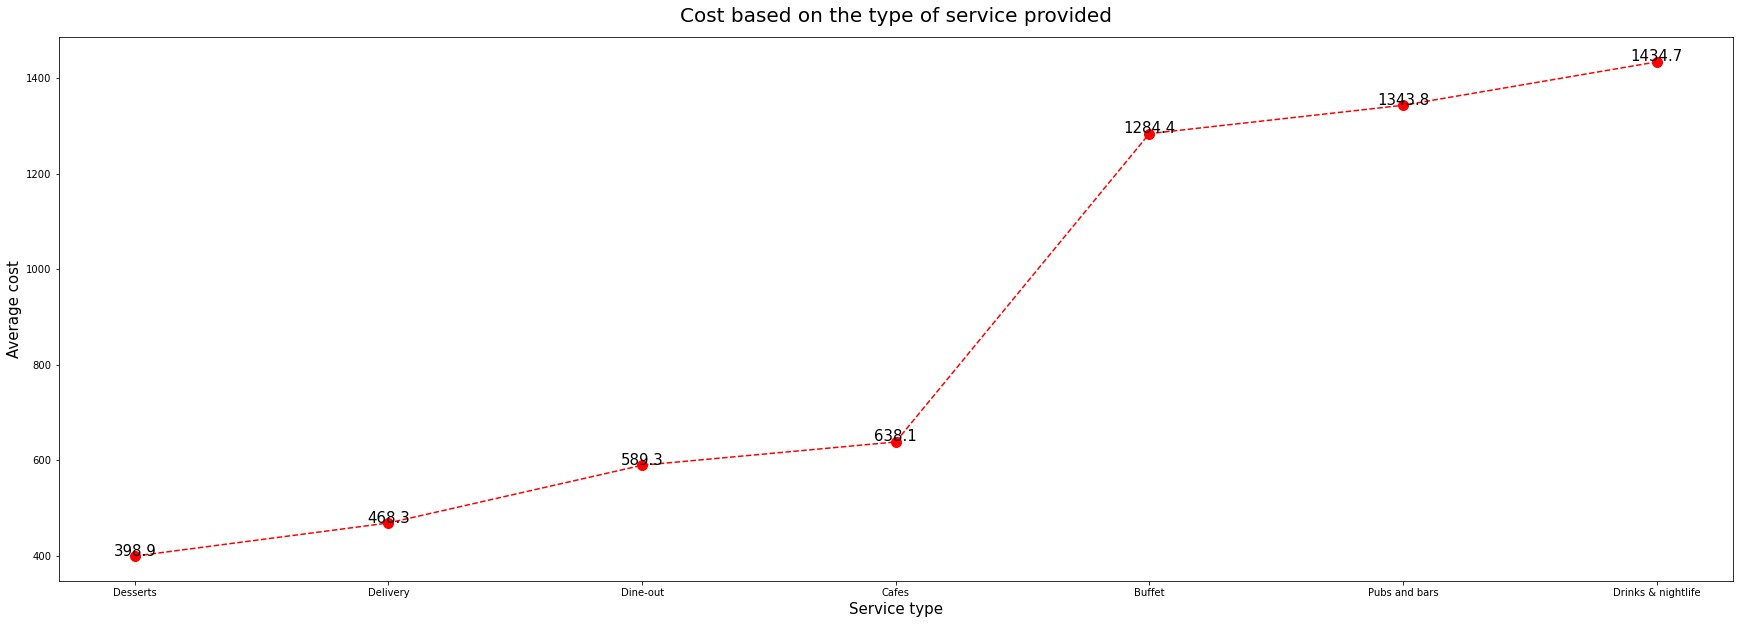

In [121]:
d=df.groupby('listed_in(type)')['approx_cost(for two people)'].mean().reset_index().sort_values(by='approx_cost(for two people)')
print(d)
plt.figure(figsize=(30,10))
plt.title('Cost based on the type of service provided',size=20,pad=15)
plt.plot(d['listed_in(type)'],d['approx_cost(for two people)'],'o--r',ms=10)
plt.xlabel('Service type',size=15)
plt.ylabel('Average cost',size=15)

for i,e in enumerate(d["approx_cost(for two people)"]):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

We can infer from the line graph, while desserts were the least expensive type of food, restaurants that served buffets. 
And drinks cost more than Rs.1300 for two people.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>21. A. Location with the highest number of restaurants
                           B. Location with the most costly restraunts
                           C. Location most popular for delivery based on frequency  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

### A. Location with the highest number of restaurants

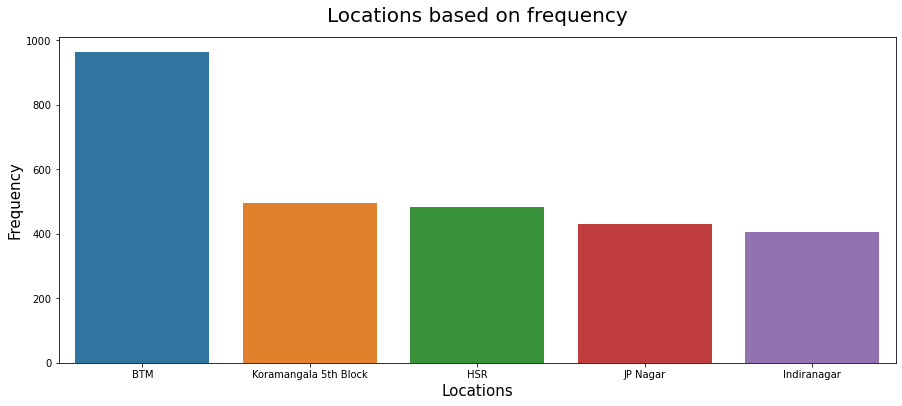

In [125]:
x=df.groupby("location")["index"].count().sort_values(ascending=False)[:5]
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x.values)
plt.title("Locations based on frequency",size=20,pad=15)
plt.xlabel("Locations",size=15)
plt.ylabel("Frequency",size=15)
plt.show()

### B. Location with the most costly restaurants

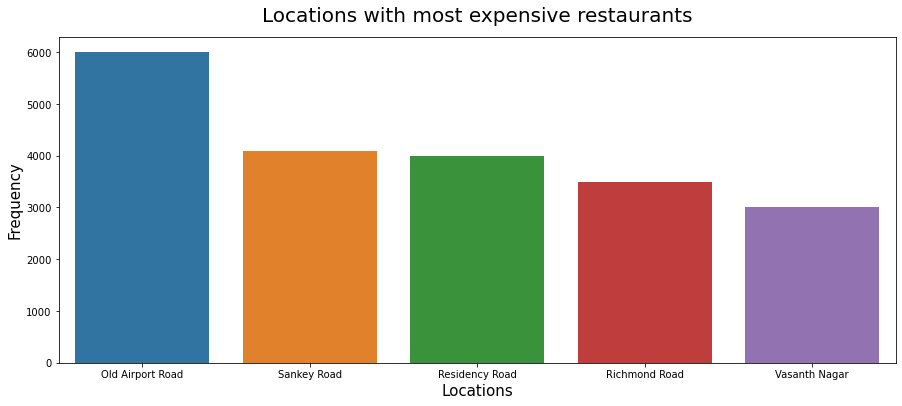

In [127]:
x=df.groupby("location")['approx_cost(for two people)'].max().sort_values(ascending=False)[:5]
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x.values)
plt.title("Locations with most expensive restaurants",size=20,pad=15)
plt.xlabel("Locations",size=15)
plt.ylabel("Frequency",size=15)
plt.show()

* Most popular delivery location is also BTM

### C. Location most popular for delivery based on frequency

### Feature engineering for listed in type:
1. Dine out: Dine out
2. Delivery: Delivery
3. Other : Dine in

In [204]:
df["listed_in(type)"].apply(lambda x: "Dine-In" if x not in ("Dine-out","Delivery") else x).value_counts()

Delivery    5068
Dine-out    3377
Dine-In     1550
Name: listed_in(type), dtype: int64

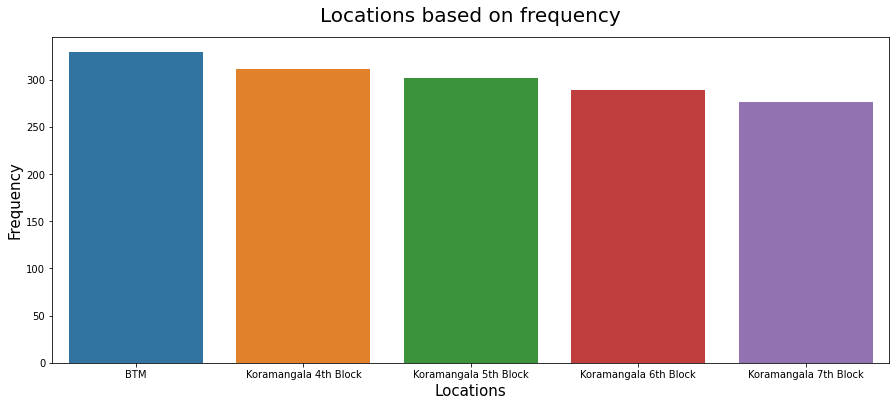

In [205]:
x=df[df["listed_in(type)"]=="Delivery"].groupby(df["listed_in(city)"])["index"].count().sort_values(ascending=False)[:5]
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x.values)
plt.title("Locations based on frequency",size=20,pad=15)
plt.xlabel("Locations",size=15)
plt.ylabel("Frequency",size=15)
plt.show()

* Locations that have majority delivery:
1. BTM
2. Kormangala 4th Block
3. Kormangala 5th Block

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>22. Based on listed_in(type) which is the most popular location based on frequency
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [214]:
x=pd.crosstab(df["location"],df["listed_in(type)"])
#x[x["Buffet"]==x["Buffet"].max()]["Buffet"]
print("Location based on the majority in types of restraunts :")
for i in x.columns:
    print(x[x[i]==x[i].max()][i].index[0]," : ",i)

Location based on the majority in types of restraunts :
Koramangala 5th Block  :  Buffet
Indiranagar  :  Cafes
BTM  :  Delivery
Jayanagar  :  Desserts
BTM  :  Dine-out
Koramangala 5th Block  :  Drinks & nightlife
Indiranagar  :  Pubs and bars


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>23. Which are most famous location for Delivery, Dine-in and Dine-out
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [207]:
df["Serve_type"]=df["listed_in(type)"].apply(lambda x: "Dine-In" if x not in ("Dine-out","Delivery") else x)

In [212]:
x=pd.crosstab(df["location"],df["Serve_type"])
for i in x.columns:
    print(x[x[i]==x[i].max()][i].index[0]," : ",i)

BTM  :  Delivery
Koramangala 5th Block  :  Dine-In
BTM  :  Dine-out


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>24.  Most expensive restaurant type in each location.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [244]:
x=pd.crosstab(index=df["location"],columns=df["rest_type"],values=df["approx_cost(for two people)"],aggfunc="max")
for i in x.columns:
    print(x[x[i]==x[i].max()][i].index[0]," : ",i)

Sarjapur Road  :  Bakery
Richmond Road  :  Bakery, Beverage Shop
HSR  :  Bakery, Cafe
JP Nagar  :  Bakery, Dessert Parlor
MG Road  :  Bakery, Kiosk
Bellandur  :  Bakery, Quick Bites
Jayanagar  :  Bakery, Sweet Shop
Race Course Road  :  Bar
Church Street  :  Bar, Cafe
Indiranagar  :  Bar, Casual Dining
Seshadripuram  :  Bar, Lounge
HSR  :  Bar, Pub
Brigade Road  :  Bar, Quick Bites
Brookefield  :  Beverage Shop
Church Street  :  Beverage Shop, Cafe
Banashankari  :  Beverage Shop, Dessert Parlor
Jayanagar  :  Beverage Shop, Quick Bites
Ulsoor  :  Cafe
Indiranagar  :  Cafe, Bakery
Koramangala 5th Block  :  Cafe, Bar
Indiranagar  :  Cafe, Casual Dining
Vasanth Nagar  :  Cafe, Dessert Parlor
Koramangala 3rd Block  :  Cafe, Lounge
Lavelle Road  :  Cafe, Quick Bites
Koramangala 6th Block  :  Casual Dining
Infantry Road  :  Casual Dining, Bar
MG Road  :  Casual Dining, Cafe
Lavelle Road  :  Casual Dining, Irani Cafee
HSR  :  Casual Dining, Lounge
BTM  :  Casual Dining, Microbrewery
Koramangala

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:200%">
                <font color="#0081B4">
                    <b>25. Find the correlation between all the variables in the dataset.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# We will be encoding all the columns having categorical data by factorize, since there is no column following a hierarchy.

In [82]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate', 'approx_cost_for_2_people', 'votes'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [83]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        9995 non-null   int64  
 1   url                          9995 non-null   int64  
 2   address                      9995 non-null   int64  
 3   name                         9995 non-null   int64  
 4   online_order                 9995 non-null   int64  
 5   book_table                   9995 non-null   int64  
 6   rate                         9995 non-null   float64
 7   votes                        9995 non-null   int64  
 8   location                     9995 non-null   int64  
 9   rest_type                    9995 non-null   int64  
 10  dish_liked                   9995 non-null   int64  
 11  cuisines                     9995 non-null   int64  
 12  approx_cost(for two people)  9995 non-null   int64  
 13  reviews_list      

In [92]:
df_en.drop(columns=["index","url"],axis=1,inplace=True)

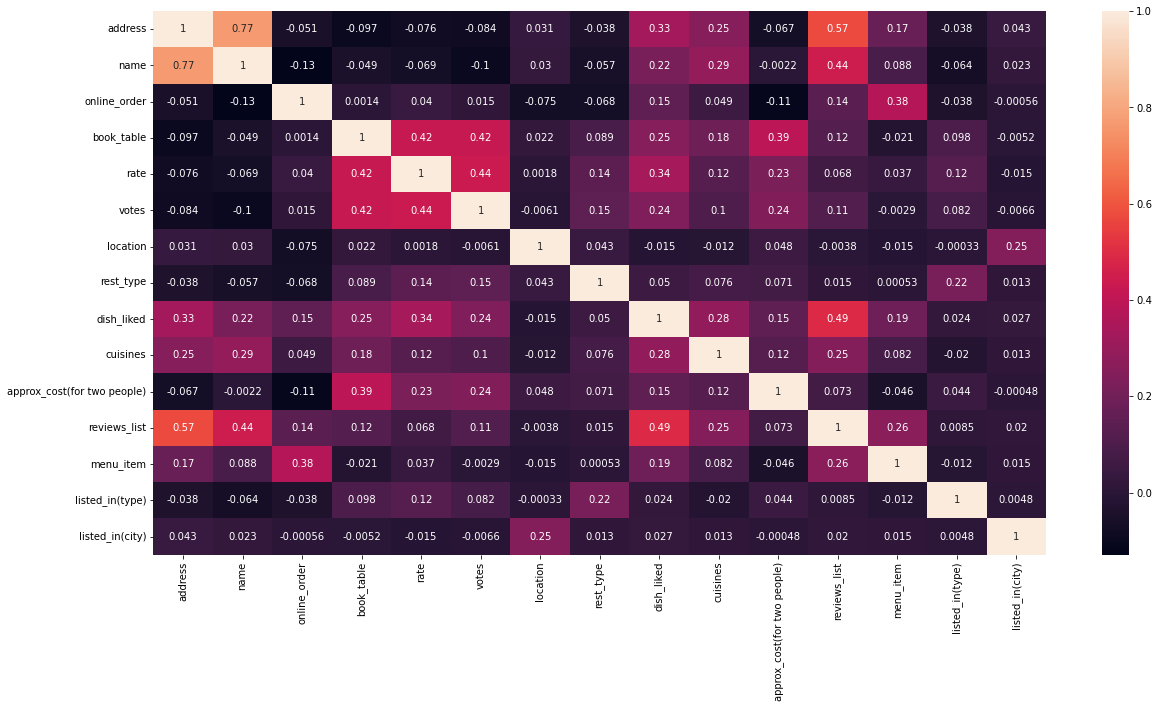

In [108]:
plt.figure(figsize=(20,10))
sns.heatmap(df_en.corr(), annot=True)
plt.show()

* There is strong positive correlation between name and address of the restaurant
* There is a slight positive correlation between address and review list
* There is a slight positive correlation between dish liked and review list